In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="JSIbdWOHfbXsBNR33Zih")
project = rf.workspace("buoy-9hp7v").project("buoys")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.38, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Buoys-2 in yolov8:: 100%|██████████| 150/150 [00:00<00:00, 4439.61it/s]


In [5]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

Ultralytics YOLOv8.2.38 🚀 Python-3.11.5 torch-2.2.2 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/shreyessridhara/Documents/colreg_nav/object_avoidance/Buoys-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

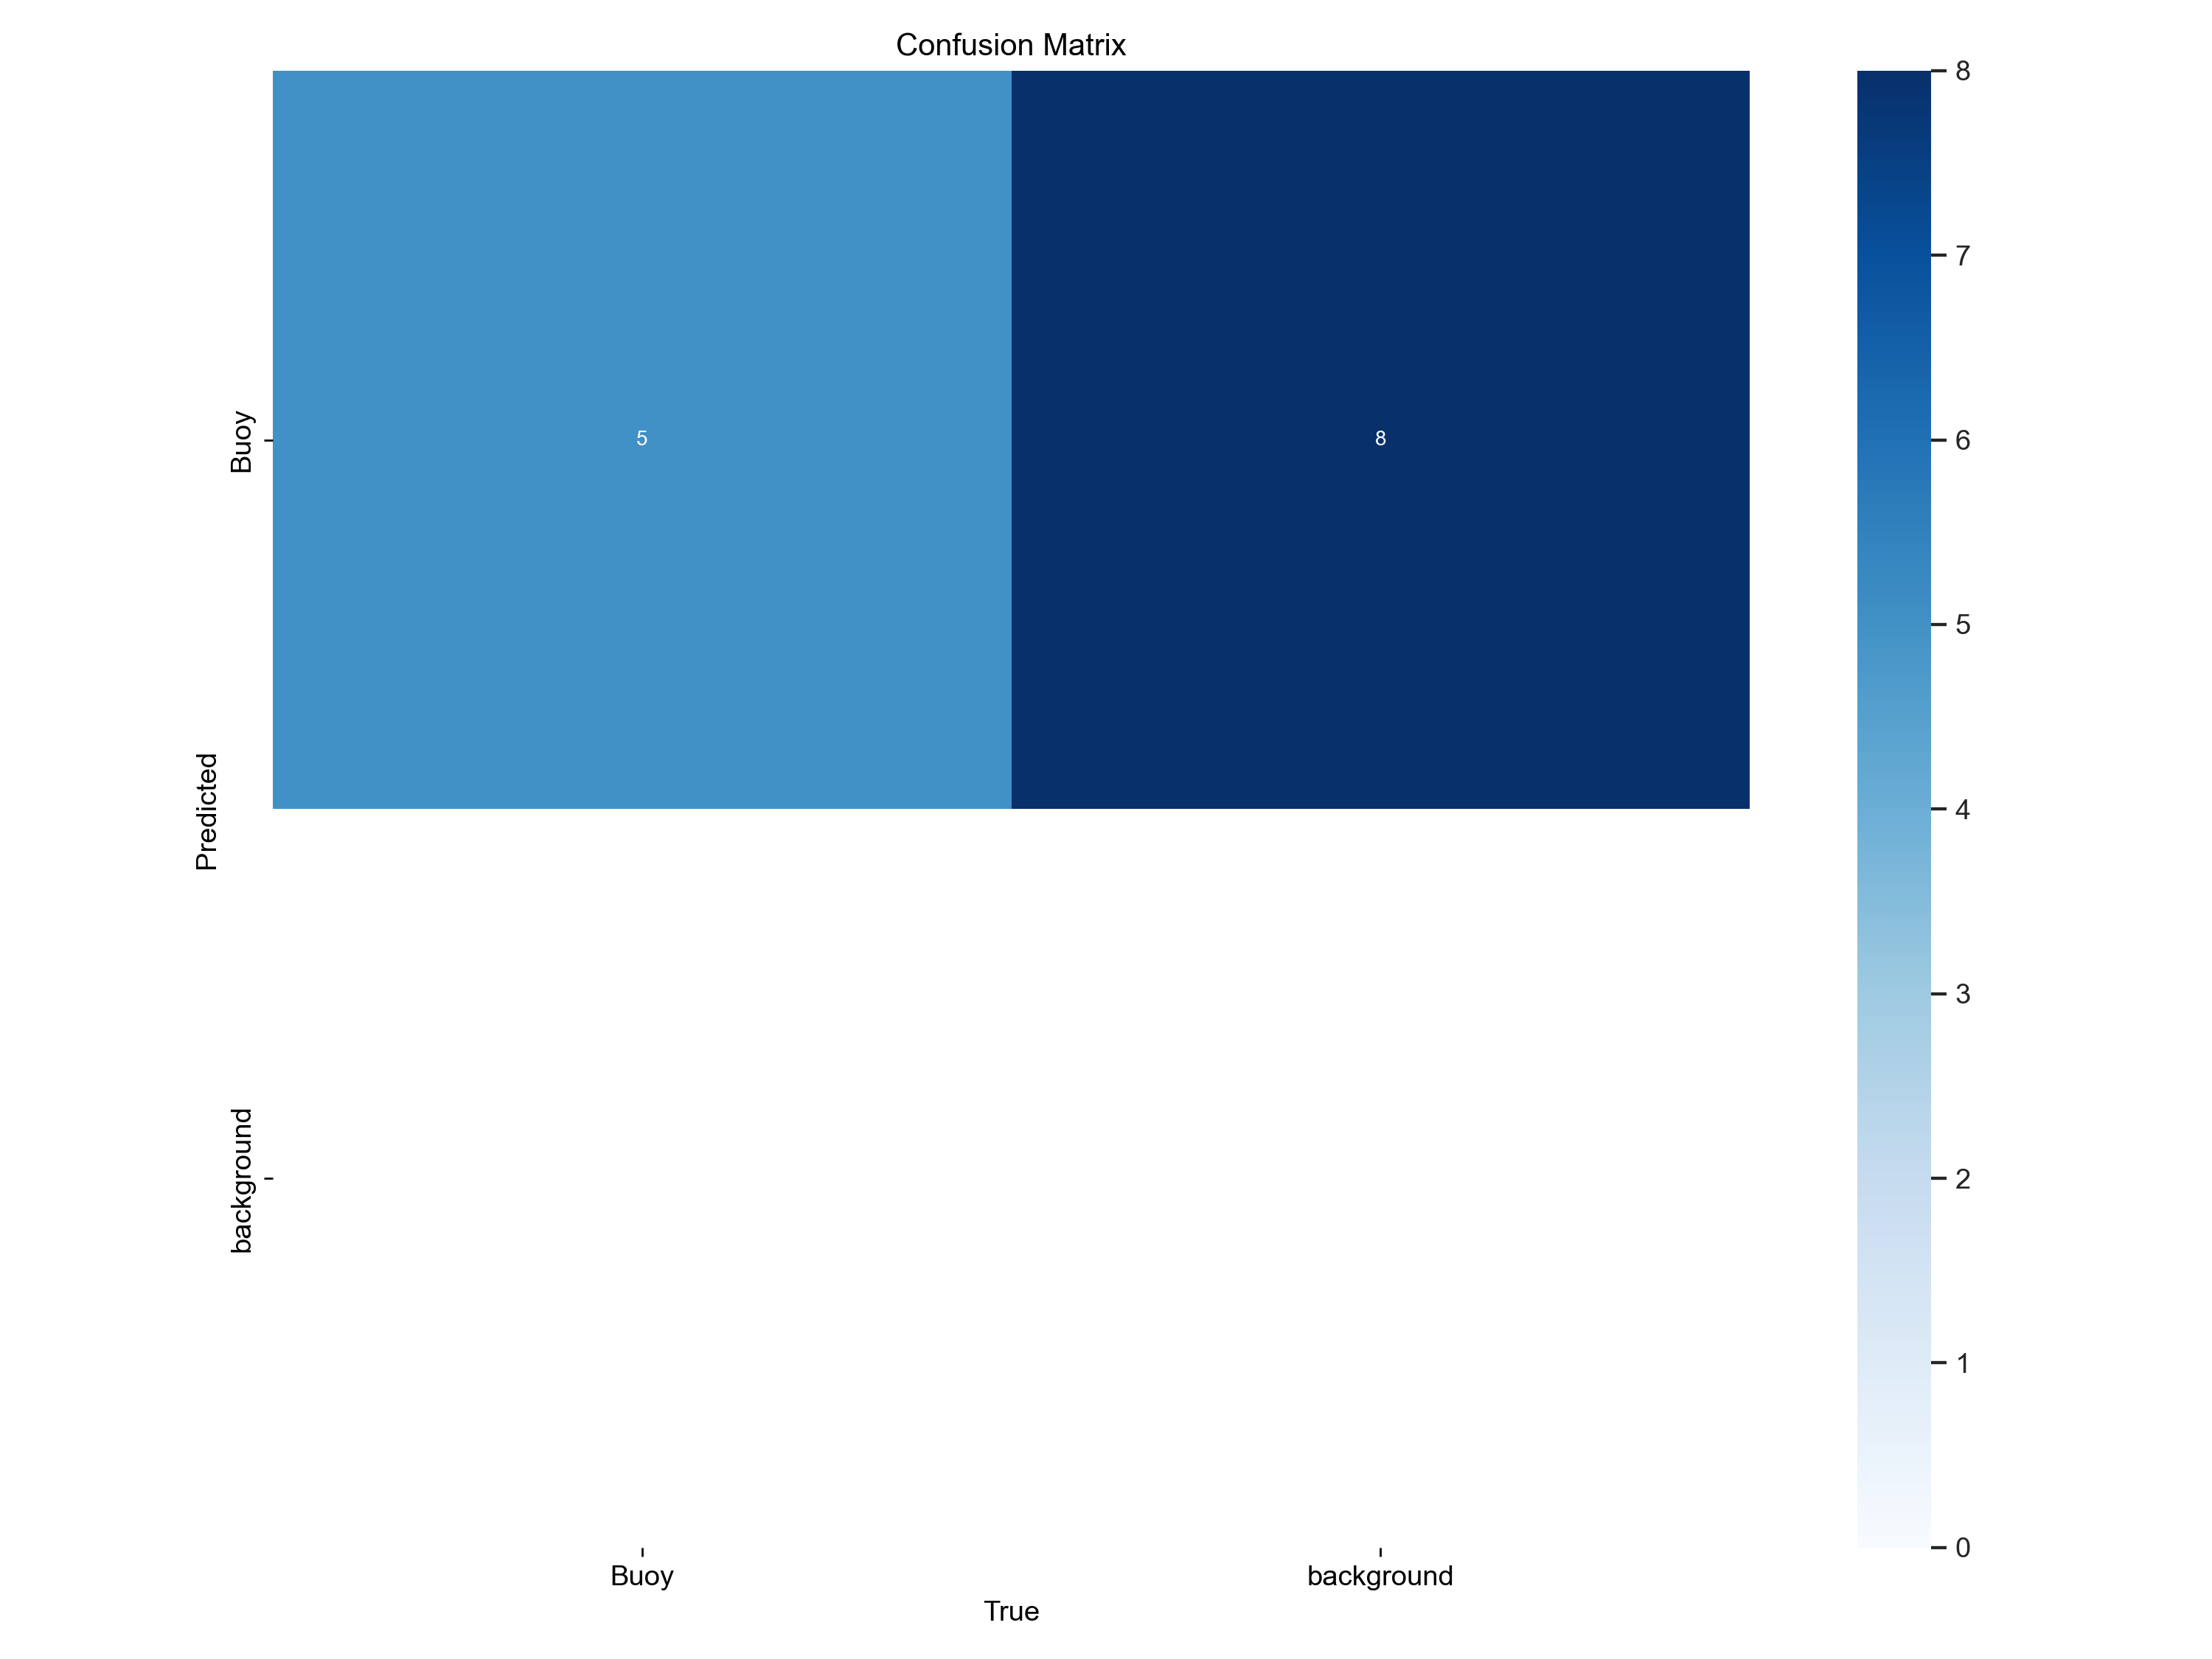

In [7]:
Image(filename=f'runs/detect/train2/confusion_matrix.png', width=600)

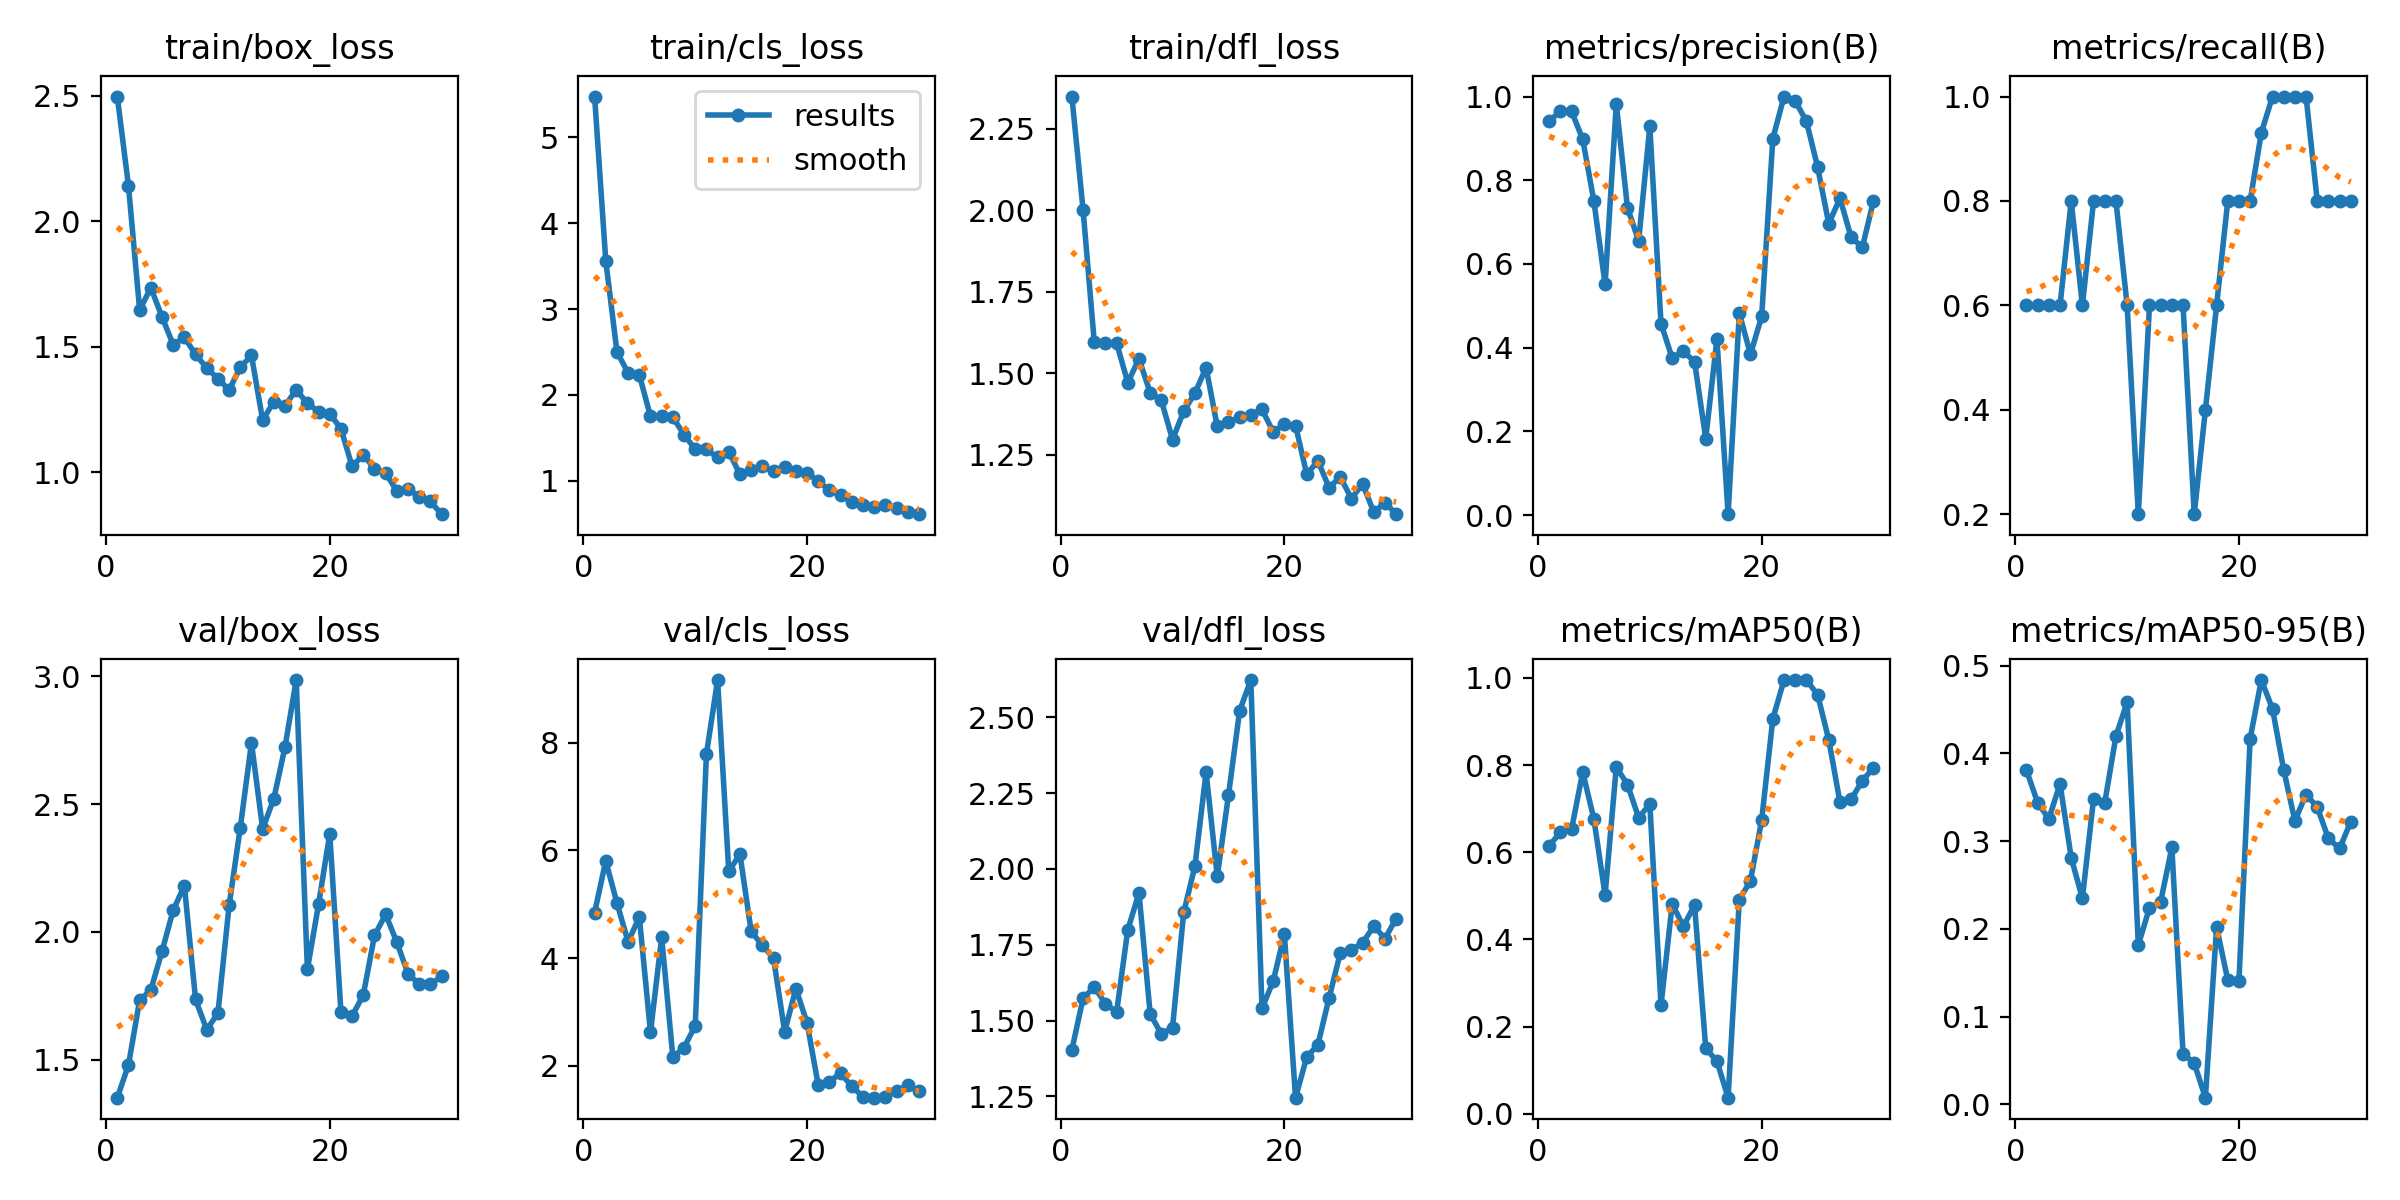

In [9]:
Image(filename=f'runs/detect/train2/results.png', width=600)

In [12]:
!yolo task=detect mode=val model='runs/detect/train2/weights/bestbuoys.pt' data={dataset.location}/data.yaml

python(80633) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Ultralytics YOLOv8.2.38 🚀 Python-3.11.5 torch-2.2.2 CPU (Apple M2)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /Users/shreyessridhara/Documents/colreg_nav/object_avoidance/Buoys
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          4          5          1      0.932      0.995      0.484
Speed: 2.5ms preprocess, 487.0ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
!yolo task=detect mode=predict model='runs/detect/train2/weights/bestbuoys.pt' conf=0.10 source={dataset.location}/test/images 

python(80818) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Ultralytics YOLOv8.2.38 🚀 Python-3.11.5 torch-2.2.2 CPU (Apple M2)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/5 /Users/shreyessridhara/Documents/colreg_nav/object_avoidance/Buoys-2/test/images/134_image_1-e1598260928432_jpg.rf.da92a08b43fac5ad79431926efd36655.jpg: 640x640 2 Buoys, 334.1ms
image 2/5 /Users/shreyessridhara/Documents/colreg_nav/object_avoidance/Buoys-2/test/images/River-Navigation-Buoy-on-The-Surface-of-The-Water_jpg.rf.f64a7f3ebd5ecd211217d1955d575c2b.jpg: 640x640 2 Buoys, 341.8ms
image 3/5 /Users/shreyessridhara/Documents/colreg_nav/object_avoidance/Buoys-2/test/images/buoy2_jpeg.rf.17dabc20e43a79cb94600c32973cb1bf.jpg: 640x640 2 Buoys, 301.7ms
image 4/5 /Users/shreyessridhara/Documents/colreg_nav/object_avoidance/Buoys-2/test/images/istockphoto-856881576-612x612_jpg.rf.92917de33a44b4f6854ad41746d59d45.jpg: 640x640 1 Buoy, 296.7ms
image 5/5 /Users/shreyessridhara/Documents/colreg_nav/object_avoidance/Buoys-2/test/images/rb-

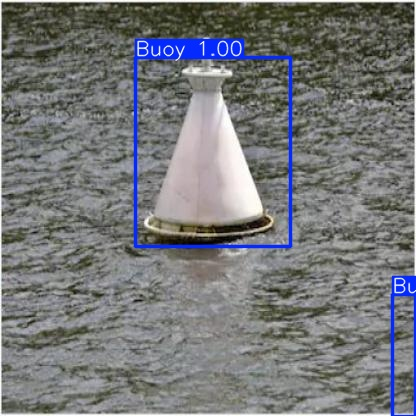

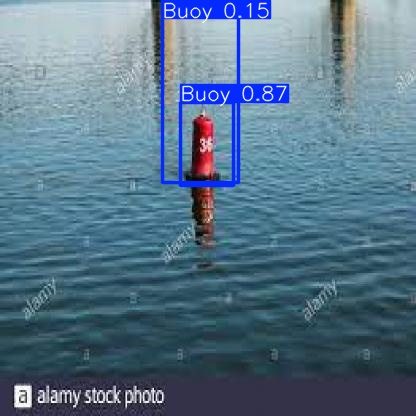

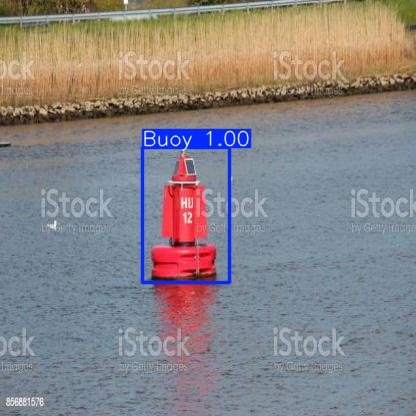

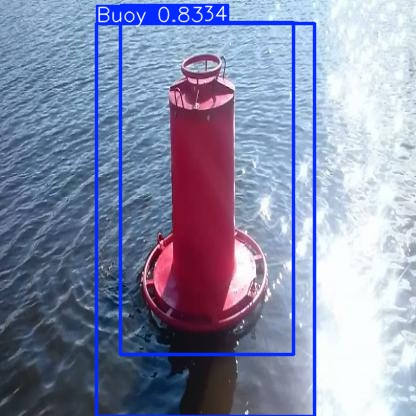

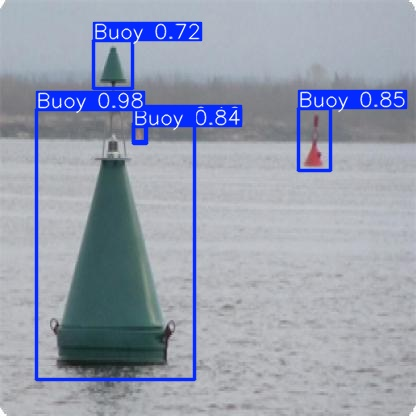

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")

## Bigger dataset